In [272]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/license.txt


In [273]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [274]:
#load data
df = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')
df2 = pd.read_csv('../input/google-play-store-apps/googleplaystore_user_reviews.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [275]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [276]:
df.shape

(10841, 13)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [278]:
#check NaNs
df.isnull().sum()

#Ratings has significant missing data entries

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Price Trends

In [279]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [280]:
#quick data type cleaning
df['Price'] = df.Price.apply(lambda x: x.replace('$',''))
df.drop(df[df['Price'] == 'Everyone'].index,inplace=True)
df['Price'] = df.Price.astype(float)
df['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

The average app price is 1.02, however most of them are free. The most expensive app is $400

In [281]:
df.Price.value_counts()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

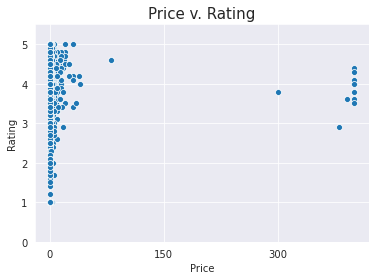

In [282]:
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=df, x="Price",y="Rating")
    ax.set_ylim(0,5.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    plt.title('Price v. Rating', size=15)
    plt.show()

In [283]:
df.shape

(10840, 13)

In [284]:
#Removing outliers to better see trends
df.drop(df[df.Price > 200].index, axis=0, inplace=True)

In [285]:
df.shape

(10823, 13)

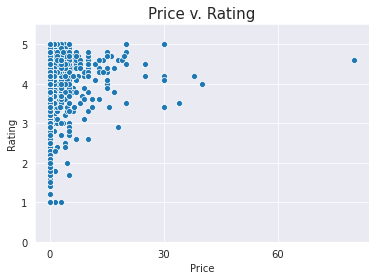

In [286]:
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=df, x="Price",y="Rating")
    ax.set_ylim(0,5.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    plt.title('Price v. Rating', size=15)
    plt.show()

# Installs

In [287]:
df.Installs.value_counts()
df.Installs.unique()
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df['Installs'] = df.Installs.astype(int)
df.Installs.unique()


array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

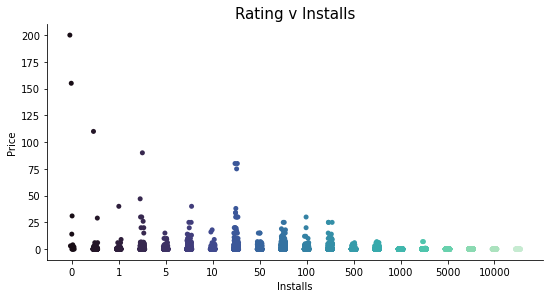

In [288]:
sns.catplot(x='Installs',y='Price',palette ='mako',data=df, aspect=2, height=4)
plt.title('Rating v Installs',fontsize=15)
plt.locator_params(nbins=10)
plt.show()

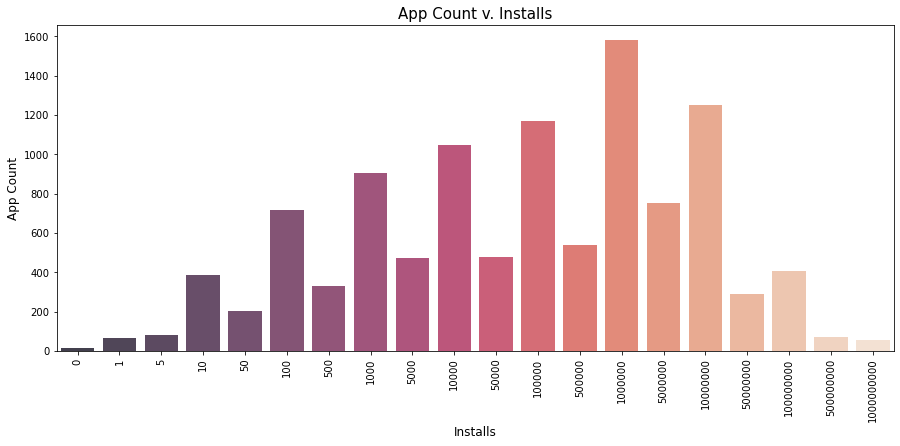

In [294]:
installs_count = df.Installs.value_counts().reset_index()
installs_count.sort_values(by=['index'], inplace=True)
installs_count = installs_count.rename(columns={'index':'Installs','Installs':'Count'})

plt.figure(figsize=(15,6))
sns.barplot(installs_count.Installs, installs_count.Count, alpha=0.8, palette='rocket')
plt.xticks(rotation='vertical')
plt.ylabel('App Count',size=12)
plt.xlabel('Installs', size=12)
plt.title('App Count v. Installs',size=15)
plt.show()


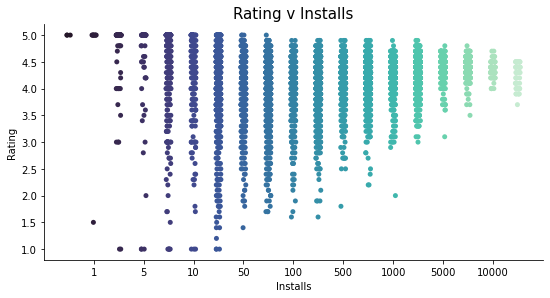

In [290]:
sns.catplot(x='Installs',y='Rating',palette ='mako',data=df, aspect=2, height=4)
plt.title('Rating v Installs',fontsize=15)
plt.locator_params(nbins=10)

There is a slight trend we can that that apps that have higher install counts tend to have higher ratings. 

# Category breakdown (exluding categories <1%) 

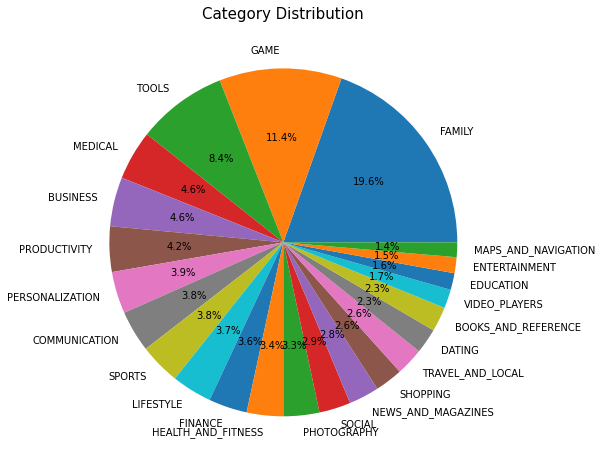

In [291]:
plt.figure(figsize=(8,8))

cat = df["Category"].value_counts()
cat.drop(cat.tail(10).index, inplace=True)

labels = (np.array(cat.index))
values = (np.array(cat/cat.sum()*100))
plt.pie(values, labels=labels, autopct = '%1.1f%%')
plt.title("Category Distribution", fontsize=15)
plt.xticks(size=5)
plt.show()

What is the average rating across different categories?

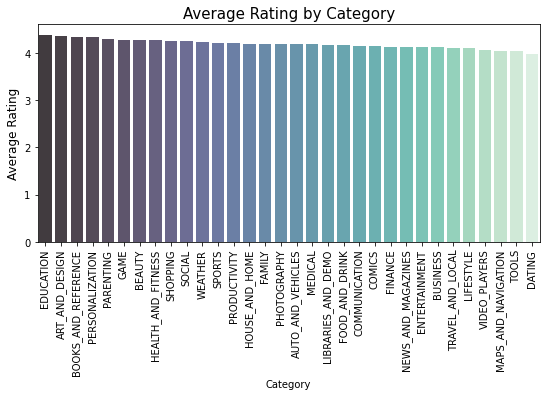

In [292]:
rating_by_cat = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
rating_by_cat.drop(rating_by_cat.index[:1], inplace=True)

plt.figure(figsize=(9,4))
sns.barplot(rating_by_cat.index, rating_by_cat.values, alpha=0.8, palette='mako')
plt.xticks(rotation='vertical')
plt.ylabel('Average Rating',size=12)
plt.title('Average Rating by Category',size=15)
plt.show()

Average rating across categories is pretty consistent. Worst rated app category is "Dating" and best is "Events". 

Distribution of ratings by each category

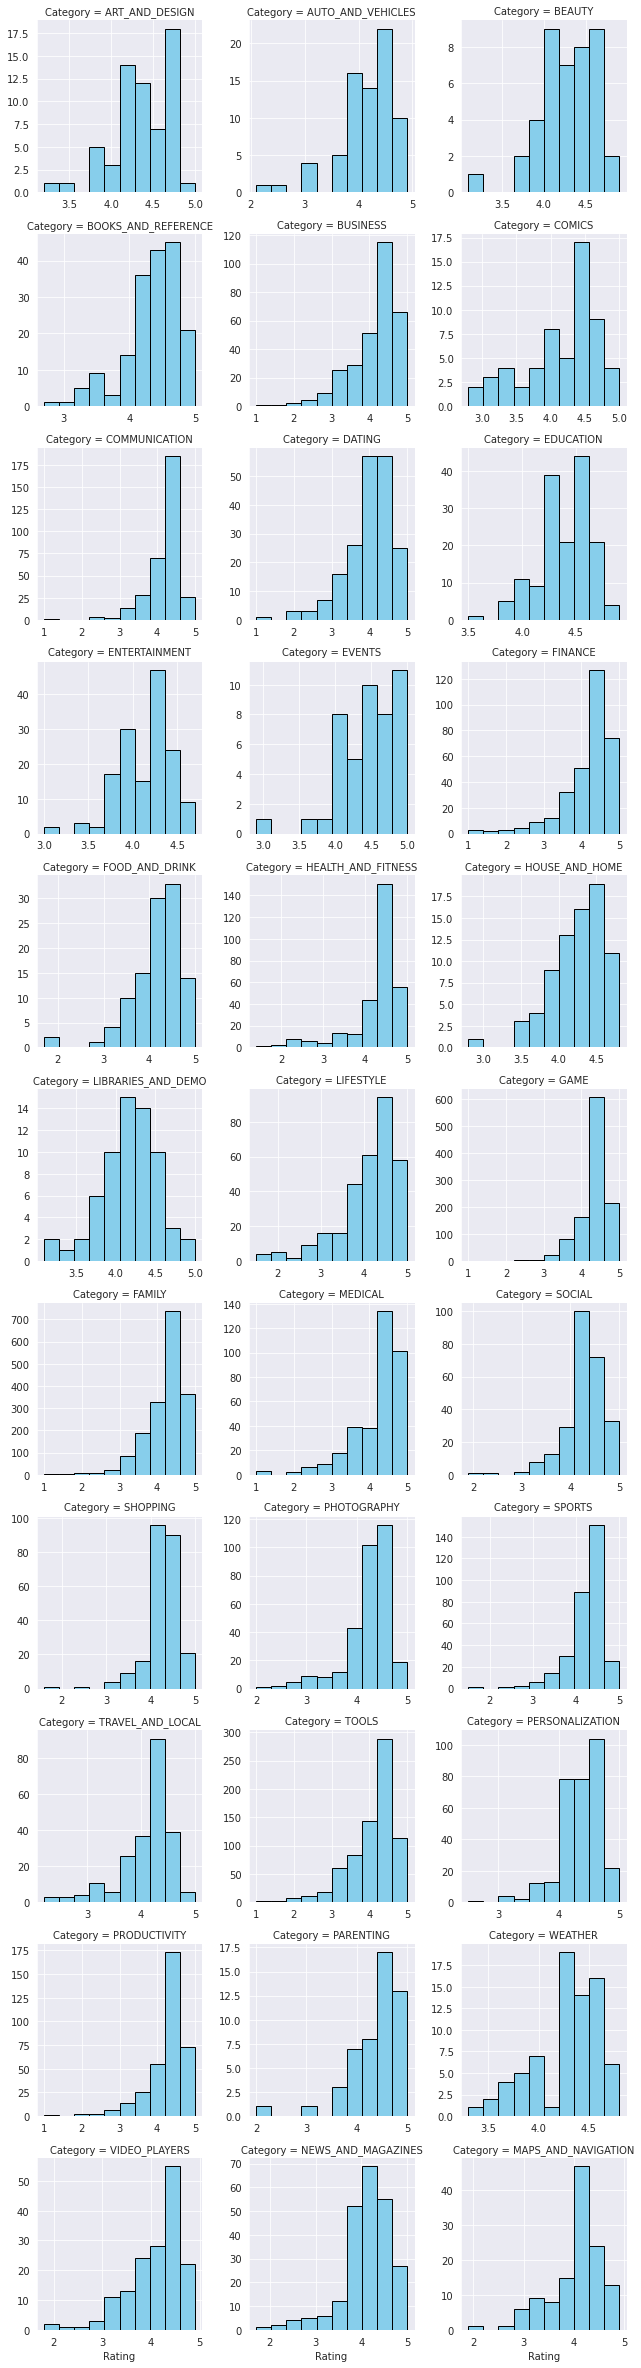

In [293]:
with sns.axes_style("darkgrid"):
    data = df[['Category','Rating']]
    g = sns.FacetGrid(data, col= "Category", col_wrap=3, sharex=False, sharey=False)
    g.map(plt.hist, "Rating", ec='black', color="skyblue")


Even though the mean is pretty consistent across the categories, their distributions vary 